In [7]:
!pip install wordcloud
!pip install Sastrawi

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import joblib
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

In [9]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv')

# Menampilkan nama-nama kolom dalam DataFrame
print(df.columns)

Index(['Unnamed: 0', 'Username', 'Link', 'Text', 'Human', 'Chat GPT', 'Date'], dtype='object')


Lima baris pertama dari dataset:
   Unnamed: 0           Username                                       Link  \
0         NaN          singkongn          https://www.tiktok.com/@singkongn   
1         NaN     sayangku.277k8     https://www.tiktok.com/@sayangku.277k8   
2         NaN      dwiyunita5590      https://www.tiktok.com/@dwiyunita5590   
3         NaN  user9389223675880  https://www.tiktok.com/@user9389223675880   
4         NaN       endahyumna07       https://www.tiktok.com/@endahyumna07   

                                                Text    Human Chat GPT  \
0                   Metropolis wangi nya enak banget  Positif  Positif   
1                                      mau dong mbak   Netral   Netral   
2                                    yah, stok habis  Negatif  Negatif   
3  rekomendasi yang buat cewe kalau di pakai sian...   Netral   Netral   
4  tidak bisa di bagian dalam siku dan di leher, ...  Negatif  Negatif   

         Date  
0  15/01/2024  
1  14/01/2024  

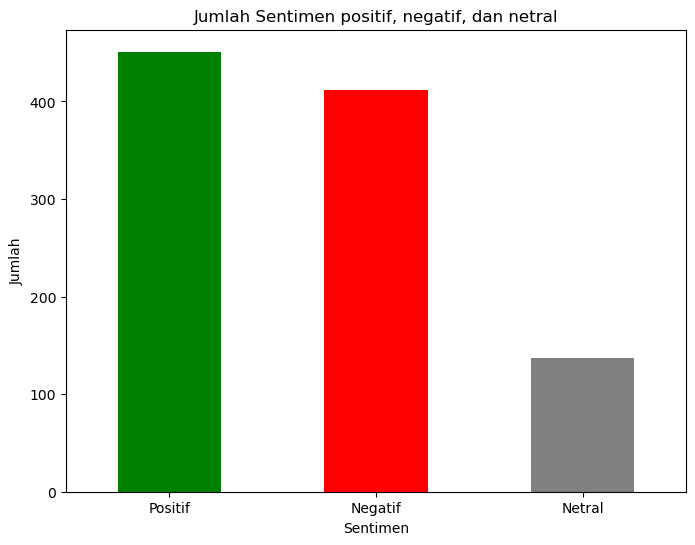

In [10]:
# Membaca dataset
data = pd.read_csv('data.csv')  # Ganti 'nama_file.csv' dengan nama file dataset Anda

# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(data.head())

# Menampilkan jumlah entri dengan sentimen negatif, netral, dan positif
sentimen_count = data['Human'].value_counts()

# Membuat plot diagram batang
plt.figure(figsize=(8, 6))
sentimen_count.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Jumlah Sentimen positif, negatif, dan netral')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Menghitung jumlah sentimen positif, netral, dan negatif
positif_count = (data['Human'] == 'Positif').sum()
netral_count = (data['Human'] == 'Netral').sum()
negatif_count = (data['Human'] == 'Negatif').sum()

# Menampilkan jumlah sentimen positif, netral, dan negatif
print("Jumlah Sentimen Positif:", positif_count)
print("Jumlah Sentimen Netral:", netral_count)
print("Jumlah Sentimen Negatif:", negatif_count)

Jumlah Sentimen Positif: 451
Jumlah Sentimen Netral: 137
Jumlah Sentimen Negatif: 412


In [12]:
# PROSES CLEANSING DATA

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Membersihkan data kolom 'Human' dari karakter yang tidak diinginkan
def clean_text(text):
    # Contoh: Menghilangkan tanda baca dan mengubah teks menjadi huruf kecil
    text = text.replace(",", "")
    text = text.replace(".", "")
    text = text.replace("!", "")
    text = text.replace("?", "")
    # Lanjutkan sesuai kebutuhan membersihkan teks
    
    return text

# Memanggil fungsi clean_text untuk membersihkan kolom 'Human'
df['Text'] = df['Text'].apply(clean_text)

# Menampilkan hasil setelah membersihkan data
print(df['Text'])

0                       Metropolis wangi nya enak banget
1                                          mau dong mbak
2                                         yah stok habis
3      rekomendasi yang buat cewe kalau di pakai sian...
4      tidak bisa di bagian dalam siku dan di leher l...
                             ...                        
995      mau nanya parfum morris emang buat parfum badan
996      varian vintage kalem banget wangi nya aku suka 
997       favorite banget yang merah sama hijau best deh
998    wody tetap di hati wangi nya ga ada yang bisa ...
999    suami aku setiap malam make yang creativ wangi...
Name: Text, Length: 1000, dtype: object


In [13]:
# PROSES CASE FOLDING

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Proses case folding pada kolom 'Human'
df['Text'] = df['Text'].str.lower()

# Menampilkan hasil setelah proses case folding
print(df['Text'])

0                       metropolis wangi nya enak banget
1                                          mau dong mbak
2                                        yah, stok habis
3      rekomendasi yang buat cewe kalau di pakai sian...
4      tidak bisa di bagian dalam siku dan di leher, ...
                             ...                        
995     mau nanya parfum morris emang buat parfum badan?
996      varian vintage kalem banget wangi nya aku suka 
997       favorite banget yang merah sama hijau best deh
998    wody tetap di hati wangi nya ga ada yang bisa ...
999    suami aku setiap malam make yang creativ wangi...
Name: Text, Length: 1000, dtype: object


In [14]:
# PROSES Stopword

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Mengambil daftar stopword dalam bahasa Indonesia
stopwords_indo = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopword dari teks
def remove_stopwords(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata
    filtered_words = [word for word in words if word not in stopwords_indo]
    return ' '.join(filtered_words)

# Memanggil fungsi remove_stopwords untuk menghapus stopword dari kolom 'Human'
df['Text'] = df['Text'].apply(remove_stopwords)

# Menampilkan hasil setelah proses penghapusan stopword
print(df['Text'])

0                       Metropolis wangi nya enak banget
1                                                   mbak
2                                        yah, stok habis
3         rekomendasi cewe pakai siang sekolah mual kak?
4                             siku leher, langsung gatal
                             ...                        
995              nanya parfum morris emang parfum badan?
996           varian vintage kalem banget wangi nya suka
997                 favorite banget merah hijau best deh
998                      wody hati wangi nya ga ngalahin
999    suami malam make creativ wangi nya kalem suka ...
Name: Text, Length: 1000, dtype: object


In [15]:
# PROSES Stemming

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Inisialisasi stemmer bahasa Inggris
stemmer = PorterStemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Memanggil fungsi stemming untuk melakukan stemming pada kolom 'Human'
df['Text'] = df['Text'].apply(stemming)

# Menampilkan hasil setelah proses stemming
print(df['Text'])

0                        metropoli wangi nya enak banget
1                                          mau dong mbak
2                                         yah, stok habi
3      rekomendasi yang buat cew kalau di pakai siang...
4      tidak bisa di bagian dalam siku dan di leher, ...
                             ...                        
995      mau nanya parfum morri emang buat parfum badan?
996        varian vintag kalem banget wangi nya aku suka
997        favorit banget yang merah sama hijau best deh
998    wodi tetap di hati wangi nya ga ada yang bisa ...
999    suami aku setiap malam make yang creativ wangi...
Name: Text, Length: 1000, dtype: object


In [16]:
# PROSES Tokenizing

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Fungsi untuk melakukan tokenisasi pada teks
def tokenize(text):
    tokens = word_tokenize(text)  # Melakukan tokenisasi kata
    return tokens

# Memanggil fungsi tokenize untuk melakukan tokenisasi pada kolom 'Human'
df['Text'] = df['Text'].apply(tokenize)

# Menampilkan hasil setelah proses tokenisasi
print(df['Text'])

0                 [Metropolis, wangi, nya, enak, banget]
1                                      [mau, dong, mbak]
2                                  [yah, ,, stok, habis]
3      [rekomendasi, yang, buat, cewe, kalau, di, pak...
4      [tidak, bisa, di, bagian, dalam, siku, dan, di...
                             ...                        
995    [mau, nanya, parfum, morris, emang, buat, parf...
996    [varian, vintage, kalem, banget, wangi, nya, a...
997    [favorite, banget, yang, merah, sama, hijau, b...
998    [wody, tetap, di, hati, wangi, nya, ga, ada, y...
999    [suami, aku, setiap, malam, make, yang, creati...
Name: Text, Length: 1000, dtype: object


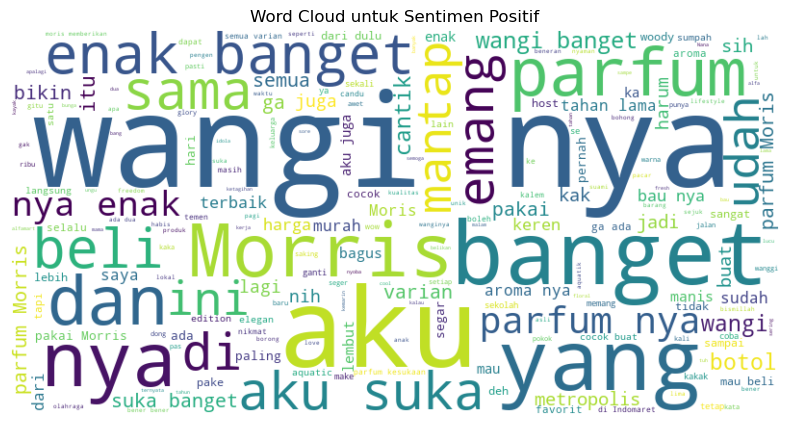

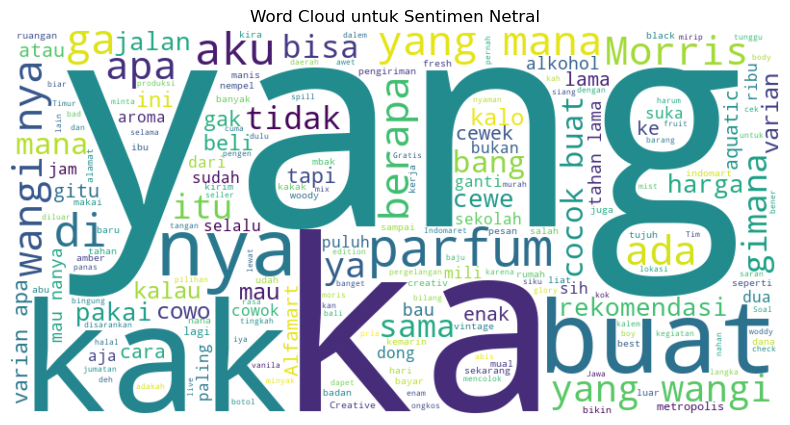

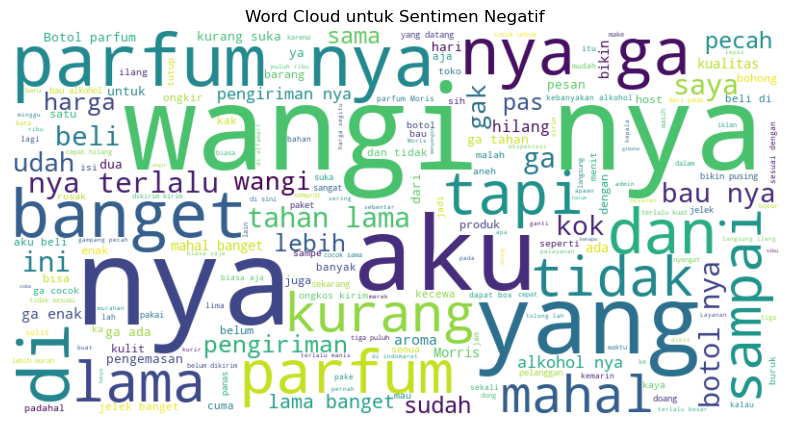

In [17]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv')

# Membuat word cloud untuk setiap sentimen
for sentiment in df['Human'].unique():
    # Menggabungkan semua teks dalam kolom 'Text' berdasarkan sentimen
    text = ' '.join(df[df['Human'] == sentiment]['Text'])
    
    # Membuat objek WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud untuk Sentimen {sentiment}')
    plt.axis('off')
    plt.show()

In [18]:
# PROSES Pembobotan Dan Pembagian Data Training Dan Data Testing Menggunakan TF-IDF

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Memisahkan fitur (X) dan label (y)
X = df['Text']
y = df['Human']

# Memisahkan data menjadi data pelatihan (training) dan data pengujian (testing) dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembelajaran (fitting) dan transformasi pada data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Melakukan transformasi pada data pengujian
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan dimensi dari matriks TF-IDF
print("Dimensi matriks TF-IDF untuk data pelatihan:", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF untuk data pengujian:", X_test_tfidf.shape)

Dimensi matriks TF-IDF untuk data pelatihan: (800, 1011)
Dimensi matriks TF-IDF untuk data pengujian: (200, 1011)


In [19]:
# Inisialisasi model regresi logistik multinomial
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Melatih model regresi logistik menggunakan data pelatihan dan labelnya
logreg_model.fit(X_train_tfidf, y_train)

# Memprediksi label untuk data pengujian
y_pred = logreg_model.predict(X_test_tfidf)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Memprediksi label untuk data pengujian
y_pred = logreg_model.predict(X_test_tfidf)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model regresi logistik multinomial:", accuracy)

# Menghitung presisi prediksi
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("Presisi model regresi logistik multinomial:", precision)

# Menghitung recall prediksi
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print("Recall model regresi logistik multinomial:", recall)

Akurasi model regresi logistik multinomial: 0.86
Presisi model regresi logistik multinomial: 0.8702115480338477
Recall model regresi logistik multinomial: 0.86


In [21]:
# Melakukan prediksi pada data pelatihan
y_train_pred = logreg_model.predict(X_train_tfidf)

# Melakukan prediksi pada data pengujian
y_test_pred = logreg_model.predict(X_test_tfidf)

# Menghitung metrik evaluasi untuk data pelatihan
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)

# Menghitung metrik evaluasi untuk data pengujian
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)

# Menampilkan hasil evaluasi
print("Hasil evaluasi model pada data pelatihan:")
print(f"Akurasi: {train_accuracy}")
print(f"Presisi: {train_precision}")
print(f"Recall: {train_recall}")

print("\nHasil evaluasi model pada data pengujian:")
print(f"Akurasi: {test_accuracy}")
print(f"Presisi: {test_precision}")
print(f"Recall: {test_recall}")

# Memeriksa kemungkinan overfitting
if train_accuracy > test_accuracy:
    print("\nModel cenderung mengalami overfitting.")
else:
    print("\nModel tidak cenderung mengalami overfitting.")

Hasil evaluasi model pada data pelatihan:
Akurasi: 0.95
Presisi: 0.9517033765305487
Recall: 0.95

Hasil evaluasi model pada data pengujian:
Akurasi: 0.86
Presisi: 0.8702115480338477
Recall: 0.86

Model cenderung mengalami overfitting.


In [22]:
# Simpan model ke dalam file
joblib.dump(logreg_model, "model100.pkl")

# Output pesan konfirmasi
print("Model berhasil disimpan dalam file 'model100.pkl'.")

Model berhasil disimpan dalam file 'model100.pkl'.


In [27]:
# Load model yang sudah dilatih
logreg_model = joblib.load("model100.pkl")

# Fungsi untuk membersihkan teks
def clean_text(text):
    stop_words = set(stopwords.words('indonesian'))
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = text.lower()  # Case folding
    words = word_tokenize(text)  # Tokenizing
    cleaned_words = [word for word in words if word not in stop_words]  # Stopword removal
    stemmed_words = [stemmer.stem(word) for word in cleaned_words]  # Stemming
    return " ".join(stemmed_words)

# Fungsi untuk melakukan klasifikasi teks
def classify_text(input_text):
    # Membersihkan teks input
    cleaned_text = clean_text(input_text)
    # Mengubah teks input menjadi vektor fitur menggunakan TF-IDF
    input_vector = tfidf_vectorizer.transform([cleaned_text])
    # Melakukan prediksi menggunakan model
    predicted_label = logreg_model.predict(input_vector)[0]
    if predicted_label == 'Positif':
        return "Kalimat termasuk dalam kategori: Positif"
    elif predicted_label == 'Negatif':
        return "Kalimat termasuk dalam kategori: Negatif"
    else:
        return "Kalimat termasuk dalam kategori: Netral"

# Contoh penggunaan
input_text = "kotak nya rusak"
result = classify_text(input_text)
print(result)

Kalimat termasuk dalam kategori: Negatif


In [24]:
!pip install --upgrade pandas

In [30]:
!pip install --user bottleneck

In [28]:
!pip install --upgrade regex

In [29]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import joblib
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

# Melihat versi pandas
print("Versi pandas:", pd.__version__)

# Melihat versi regex
print("Versi regex:", re.__version__)

# Melihat versi matplotlib
print("Versi matplotlib:", matplotlib.__version__)

# Melihat versi nltk
print("Versi nltk:", nltk.__version__)

# Melihat versi sklearn
print("Versi scikit-learn:", sklearn.__version__)

# Melihat versi joblib
print("Versi joblib:", joblib.__version__)

# Melihat versi Sastrawi
!pip show Sastrawi

# Melihat versi wordcloud
!pip show wordcloud

Versi pandas: 2.2.2
Versi regex: 2.2.1
Versi matplotlib: 3.7.2
Versi nltk: 3.8.1
Versi scikit-learn: 1.3.0
Versi joblib: 1.2.0
Name: Sastrawi
Version: 1.0.1
Summary: Library for stemming Indonesian (Bahasa) text
Home-page: https://github.com/har07/sastrawi
Author: Hanif Amal Robbani
Author-email: dev.har07@gmail.com
License: MIT
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: 
Required-by: 
Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [31]:
!pip search regex

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.
